## **Exploratory Data Analysis of Medical Appointments Data**
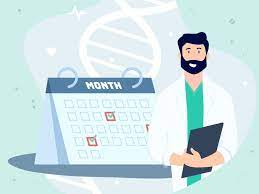

**Today we will be working with the Medical Appointment No-Show dataset that contains information about the patients’ appointments**

In [2]:
#import all required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


**Reading CSV Dataset**


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/KaggleV2-May-2016.csv')

**Before cleaning the data, let’s check the data types of each column**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


**Changing the data type of date fields using parse_dates parameter of read_csv method**

In [5]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/KaggleV2-May-2016.csv', parse_dates=['ScheduledDay', 'AppointmentDay'])

**Dropping fields PatientID and AppointmentID as they are not required for Analysis**

In [6]:
df.drop(['PatientId', 'AppointmentID'], axis=1, inplace=True)

**Check the column names and data type to re-confirm**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   Gender          110527 non-null  object             
 1   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 2   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 3   Age             110527 non-null  int64              
 4   Neighbourhood   110527 non-null  object             
 5   Scholarship     110527 non-null  int64              
 6   Hipertension    110527 non-null  int64              
 7   Diabetes        110527 non-null  int64              
 8   Alcoholism      110527 non-null  int64              
 9   Handcap         110527 non-null  int64              
 10  SMS_received    110527 non-null  int64              
 11  No-show         110527 non-null  object             
dtypes: datetime64[ns, UTC](2), int64(7), object(3)
memory usage: 10.1+ MB


**Use head() method to display the first 10 rows of the dataframe**

In [8]:
df.head(10)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,F,2016-04-27 08:36:51+00:00,2016-04-29 00:00:00+00:00,76,REPÚBLICA,0,1,0,0,0,0,No
6,F,2016-04-27 15:05:12+00:00,2016-04-29 00:00:00+00:00,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,F,2016-04-27 15:39:58+00:00,2016-04-29 00:00:00+00:00,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,F,2016-04-29 08:02:16+00:00,2016-04-29 00:00:00+00:00,21,ANDORINHAS,0,0,0,0,0,0,No
9,F,2016-04-27 12:48:25+00:00,2016-04-29 00:00:00+00:00,19,CONQUISTA,0,0,0,0,0,0,No


**Check number of Samples and Features using .shape attribute**

In [9]:
print("Number of patients: ", df.shape[0])
print("Number of data points(columns): ", df.shape[1])

Number of patients:  110527
Number of data points(columns):  12


## **Cleaning/Preparing Data for Analysis**

**Let's rename misspelled column names**

In [10]:
df = df.rename(columns={'Hipertension': 'Hypertension', 'Handcap': 'Handicap', 'SMS_received': 'SMSReceived'})


**Rename “No-show” column to “Presence” and its values to ‘Present’ and ‘Absent’**

In [11]:
df['Presence'] = df['No-show'].apply(lambda x: 'Present' if x == "No" else 'Absent')

**If an appointment day comes before the scheduled day, then we need to swap their values**

In [12]:
df['AppointmentDay']= np.where((df['AppointmentDay']- df['ScheduledDay']).dt.days < 0, df['ScheduledDay'], df['AppointmentDay'])


**Calculate Wait Time for each patient**

In [13]:
df['Wait Time'] = df['AppointmentDay'] - df['ScheduledDay']
df['Wait Time'] =df['Wait Time'].dt.days


**Calculate Weekday of appointments**

In [14]:
df['WeekDay'] = df['AppointmentDay'].apply(lambda x: x.weekday())
replace_map = {'WeekDay': {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday'}}
df.replace(replace_map, inplace=True)

**Profile the data using head() method**

In [15]:
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,No-show,Presence,Wait Time,WeekDay
0,F,2016-04-29 18:38:08+00:00,2016-04-29 18:38:08+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Present,0,Friday
1,M,2016-04-29 16:08:27+00:00,2016-04-29 16:08:27+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Present,0,Friday
2,F,2016-04-29 16:19:04+00:00,2016-04-29 16:19:04+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,Present,0,Friday
3,F,2016-04-29 17:29:31+00:00,2016-04-29 17:29:31+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,Present,0,Friday
4,F,2016-04-29 16:07:23+00:00,2016-04-29 16:07:23+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,Present,0,Friday


**Check for Null values**

In [16]:
df.isnull().sum()

Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hypertension      0
Diabetes          0
Alcoholism        0
Handicap          0
SMSReceived       0
No-show           0
Presence          0
Wait Time         0
WeekDay           0
dtype: int64

**Statistics of numerical data**

In [17]:
df.describe()

,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,Wait Time
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,9.532739
std,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,15.027729
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,14.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,178.000000


**Show the Gender-wise distribution of patients who did not show up for the appointment**

In [18]:
df.query('Presence=="Absent"')['Gender'].value_counts()


F    14594
M     7725
Name: Gender, dtype: int64

**Show the Gender-wise distribution of patients who were present as per the appointment**

In [19]:
df.query('Presence=="Present"')['Gender'].value_counts()

F    57246
M    30962
Name: Gender, dtype: int64

**Graphical representation of patients with respect to No-Show data**

Total patients present : 88208 | Total patients absent : 22319


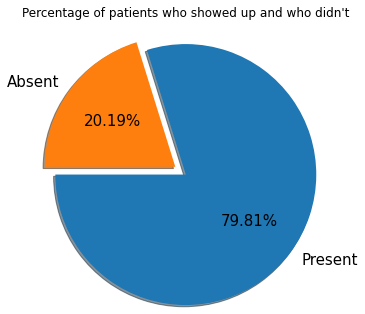

In [20]:
label_Names = ["Present", "Absent"]
data = [df.query('Presence == "Present"').count()[0], df.query('Presence == "Absent"').count()[0]]
print('Total patients present :', data[0],'| Total patients absent :', data[1])
explode = (0, 0.15)
plt.axis('equal'); 
plt.pie(data,radius=1.5,shadow=True ,labels = label_Names,explode=explode, startangle=180,autopct='%0.2f%%',textprops = {"fontsize":15})
plt.title("Percentage of patients who showed up and who didn't",y=1.2);

**Find the average age of people who were present as well as those who were absent for the appointment**

In [21]:
from numpy.lib.function_base import average

present = df['Presence'] == "Present"
absent = df['Presence'] == "Absent"

df_present_patients = df[present]
df_absent_patients = df[absent]

x1 = df_present_patients.Age.values
x2 = df_absent_patients.Age.values

print('Average age of people who showed up for the appointment :',round(average(x1)), 'Yrs')
print('Average age of people who did not showed up for the appointment :',round(average(x2)), 'Yrs')

Average age of people who showed up for the appointment : 38 Yrs
Average age of people who did not showed up for the appointment : 34 Yrs


**Show the distribution of Appointment by Patient's Age**

Text(0, 0.5, 'Appointment Count')

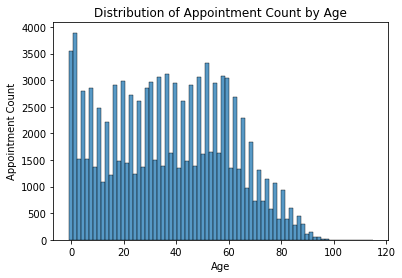

In [22]:
plt.figure(figsize=(6,4))
plt.title('Distribution of Appointment Count by Age')
x = sns.histplot(data=df,x='Age')
x.set_ylabel("Appointment Count")

**Show the No-Show data on top of Appointment count and Patient's Age**

Text(0, 0.5, 'Appointment Count')

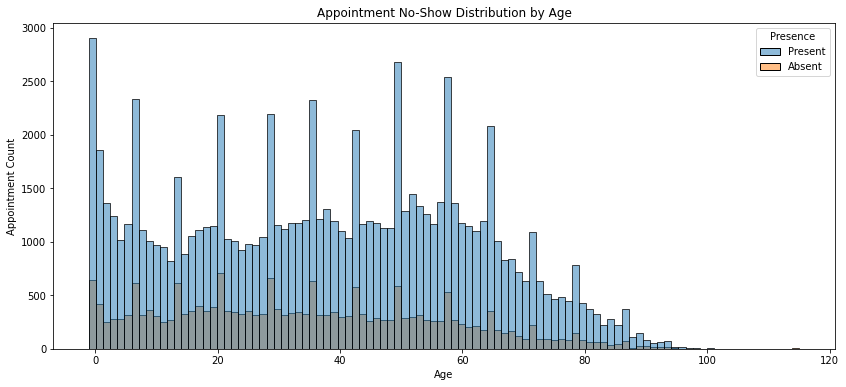

In [23]:
plt.figure(figsize=(14,6))
y = sns.histplot(x="Age", data=df, hue="Presence",bins=100,alpha=0.5)
y.set_title("Appointment No-Show Distribution by Age")
y.set_ylabel("Appointment Count")

**Calculate numeric dummy variable of 'Presence' variable for further analysis and plotting purpose**

In [24]:
df['Presence_binary']=df['Presence'].apply(lambda x: 1 if x == "Present" else 0)
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,No-show,Presence,Wait Time,WeekDay,Presence_binary
0,F,2016-04-29 18:38:08+00:00,2016-04-29 18:38:08+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Present,0,Friday,1
1,M,2016-04-29 16:08:27+00:00,2016-04-29 16:08:27+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Present,0,Friday,1
2,F,2016-04-29 16:19:04+00:00,2016-04-29 16:19:04+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,Present,0,Friday,1
3,F,2016-04-29 17:29:31+00:00,2016-04-29 17:29:31+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,Present,0,Friday,1
4,F,2016-04-29 16:07:23+00:00,2016-04-29 16:07:23+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,Present,0,Friday,1


**Find the number of people with No-Show having problem of Hypertension, Diabetes and age above average age of all the patients**

In [33]:
Q1= df.loc[(df['Presence_binary']==0) & (df['Hypertension']==1) & (df['Diabetes']==1) & (df['Age'] > average(df['Age']))]
          
print('Number of people with NO-SHOW having Diabetics, Hypertension and Age above average are:',len(Q1))
#Q1

Number of people with NO-SHOW having Diabetics, Hypertension and Age above average are: 1110


**Find the number of people with No Show as they did not receive SMS alert, wait time less is than average wait time of all patients and appointment is on weekend**

In [26]:
Q2 = df.loc[(df['Presence_binary']==0) &(df['Wait Time'] < average(df['Wait Time'])) & (df['SMSReceived'] == 0) & (df['WeekDay'] == 'Saturday') |  (df['WeekDay'] == 'Sunday')]
print('Number of people with NO-SHOW having less than average Wait Time, did not receive appointment SMS alert and appointment day on weekend are: ', len(Q2))
#Q2

Number of people with NO-SHOW having less than average Wait Time, did not receive appointment SMS alert and appointment day on weekend are:  6


**Show the effect of Gender, Alcoholism, Diabetes and Hypertension on No-Show data**

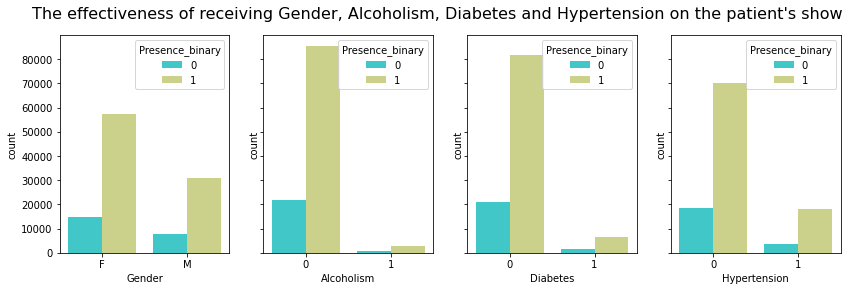

In [29]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, sharey=True)
sns.countplot(x='Gender', data=df, hue='Presence_binary', ax=ax1, palette='rainbow')
sns.countplot(x='Alcoholism', data=df, hue='Presence_binary', ax=ax2, palette='rainbow')
sns.countplot(x='Diabetes', data=df, hue='Presence_binary', ax=ax3, palette='rainbow')
sns.countplot(x='Hypertension', data=df, hue='Presence_binary', ax=ax4, palette='rainbow')
fig.set_figwidth(14)
fig.set_figheight(4)
fig.suptitle("The effectiveness of Gender, Alcoholism, Diabetes and Hypertension on the patient's show", fontsize=16);

**Defined a function to plot bar graph and use it to show the gender wise distribution of No-Show data**

In [42]:
def barplot(df, xvar, normalize=True, rot=0, kind='bar', figsize=(10,5), log=False):
    df['Presence'].groupby(df[xvar]).value_counts(normalize=normalize).unstack('Presence').plot(kind=kind, rot=rot, width=0.8, figsize=figsize, log=log, edgecolor='black')
    # Add title and format it
    plt.title("Show/No show for {}".format(xvar).title())
    # Add x label and format it
    plt.xlabel(xvar.title())
    # Add y label and format it
    plt.ylabel("Frequency".title())

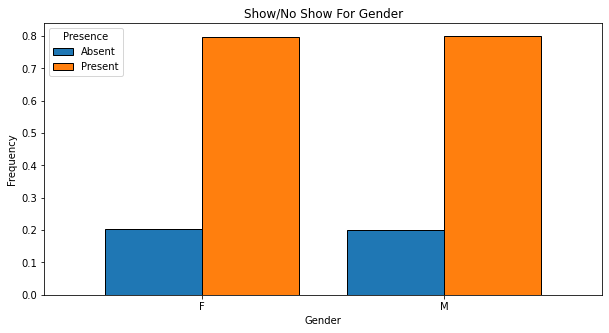

In [43]:
barplot(df, 'Gender')

**categorize the age column as child, teens, adults and senior to check the significance of no-show w.r.t each age bracket**

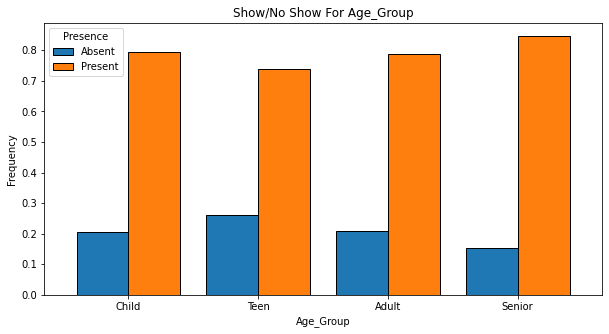

In [44]:
bins = [0, 13, 19, 60, 116]
labels = ['Child','Teen','Adult','Senior']
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, include_lowest= True, right= False)

barplot(df, 'Age_Group');

**Categorize the Wait Time column to check the significance of it on the no-show data**

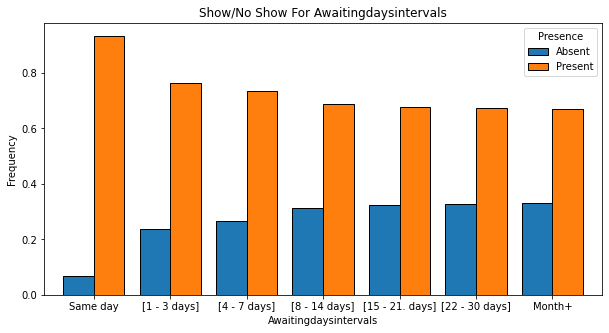

In [45]:
bins = [0,1,4,8,15,22,31,170]
labels = ['Same day', '[1 - 3 days]', '[4 - 7 days]', '[8 - 14 days]', '[15 - 21. days]', '[22 - 30 days]', 'Month+']
df['AwaitingDaysIntervals'] = pd.cut(df['Wait Time'], bins=bins, labels=labels, include_lowest=True, right=False)

barplot(df, 'AwaitingDaysIntervals')